In [84]:
%tensorflow_version 2.0.0
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.1.0


In [85]:
fashion = keras.datasets.fashion_mnist
type(fashion)


module

In [86]:
fashion

<module 'tensorflow_core.keras.datasets.fashion_mnist' from '/tensorflow-2.1.0/python3.6/tensorflow_core/python/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [87]:
(X_train, y_train), (X_test, y_test) = fashion.load_data()
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [88]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [89]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [0]:
classes = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

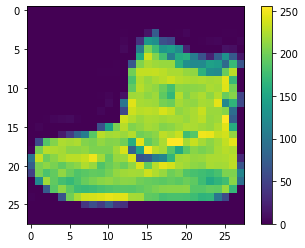

In [91]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()


In [92]:
print(y_train[0])

9


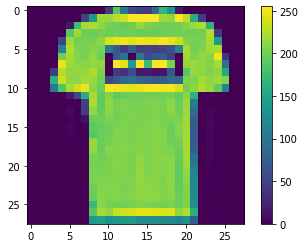

In [93]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [94]:
print(y_train[1])

0


In [0]:
X_train_scale=X_train/255.0
X_test_scale=X_test/255.0


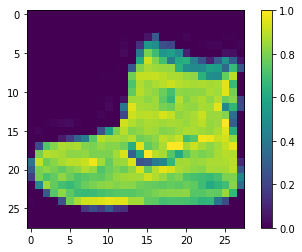

In [96]:
plt.figure()
plt.imshow(X_train_scale[0])
plt.colorbar()

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [0]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [99]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [101]:
history=model.fit(X_train_scale, y_train, epochs = 30,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 6s 117us/sample - loss: 0.5084 - accuracy: 0.8173 - val_loss: 0.4336 - val_accuracy: 0.8499
Epoch 2/30
48000/48000 [==============================] - 5s 108us/sample - loss: 0.3765 - accuracy: 0.8609 - val_loss: 0.3712 - val_accuracy: 0.8623
Epoch 3/30
48000/48000 [==============================] - 5s 106us/sample - loss: 0.3423 - accuracy: 0.8730 - val_loss: 0.3544 - val_accuracy: 0.8683
Epoch 4/30
48000/48000 [==============================] - 5s 110us/sample - loss: 0.3161 - accuracy: 0.8833 - val_loss: 0.3409 - val_accuracy: 0.8759
Epoch 5/30
48000/48000 [==============================] - 5s 108us/sample - loss: 0.2985 - accuracy: 0.8882 - val_loss: 0.3450 - val_accuracy: 0.8726
Epoch 6/30
48000/48000 [==============================] - 5s 106us/sample - loss: 0.2839 - accuracy: 0.8932 - val_loss: 0.3289 - val_accuracy: 0.8781
Epoch 7/30
48000/48000 [==========================

In [102]:
test_loss, test_accuracy = model.evaluate(X_test_scale, y_test)
print(test_loss , test_accuracy)

10000/10000 [==============================] - 1s 51us/sample - loss: 0.4841 - accuracy: 0.8884
0.48412951419353484 0.8884


In [0]:
pred_classes = model.predict_classes(X_test_scale)

In [104]:
pred_classes

array([9, 2, 1, ..., 8, 1, 5])

In [0]:
pred_val = model.predict(X_test_scale)

In [106]:
pred_val[0],pred_classes[0]

(array([4.2593507e-12, 4.3492657e-10, 2.4961541e-10, 1.0304436e-10,
        7.4382903e-11, 8.7468585e-08, 2.4856128e-09, 1.3592727e-04,
        1.1035867e-15, 9.9986398e-01], dtype=float32), 9)

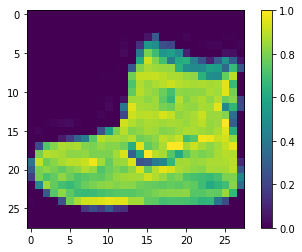

In [107]:
plt.figure()
plt.imshow(X_train_scale[0])
plt.colorbar()

In [108]:
pred_val[1],pred_classes[1]

(array([3.8547907e-09, 1.0717941e-15, 9.9986827e-01, 1.9621554e-15,
        1.0207563e-04, 2.1547854e-14, 2.9698649e-05, 1.3908813e-25,
        4.2614507e-15, 1.9651628e-19], dtype=float32), 2)

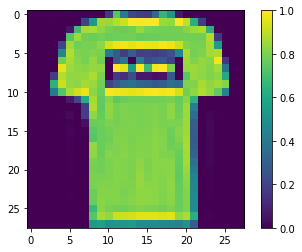

In [109]:
plt.figure()
plt.imshow(X_train_scale[1])
plt.colorbar()

In [110]:
pred_val[1],pred_classes[1]

(array([3.8547907e-09, 1.0717941e-15, 9.9986827e-01, 1.9621554e-15,
        1.0207563e-04, 2.1547854e-14, 2.9698649e-05, 1.3908813e-25,
        4.2614507e-15, 1.9651628e-19], dtype=float32), 2)

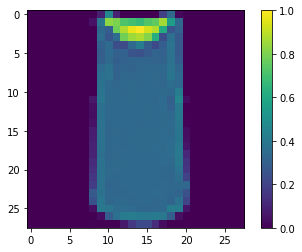

In [111]:
plt.figure()
plt.imshow(X_train_scale[2])
plt.colorbar()

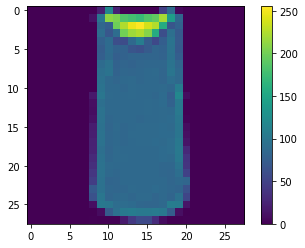

In [112]:
plt.figure()
plt.imshow(X_train[2])
plt.colorbar()

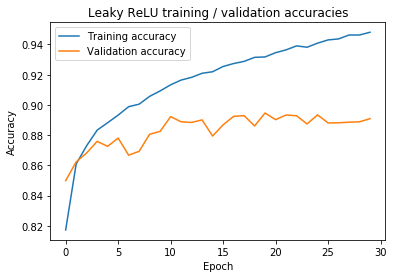

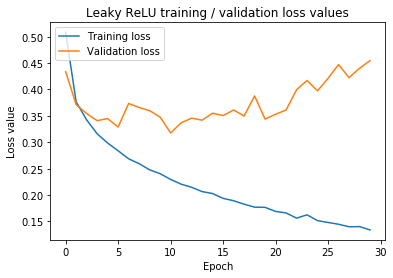

In [113]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Leaky ReLU training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Leaky ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
mat=confusion_matrix(y_test,pred_classes)

In [116]:
mat

array([[884,   1,  22,   9,   3,   1,  76,   0,   4,   0],
       [  2, 975,   1,  14,   4,   0,   3,   0,   1,   0],
       [ 26,   1, 864,   7,  62,   0,  39,   0,   1,   0],
       [ 34,   8,  23, 843,  55,   0,  33,   0,   4,   0],
       [  1,   0, 134,  18, 795,   0,  49,   0,   3,   0],
       [  0,   0,   0,   0,   0, 963,   0,  27,   1,   9],
       [161,   0,  95,  16,  61,   0, 658,   0,   9,   0],
       [  0,   0,   0,   0,   0,   6,   0, 974,   0,  20],
       [  3,   0,   3,   1,   4,   2,   3,   8, 976,   0],
       [  0,   0,   0,   0,   1,   7,   1,  39,   0, 952]])

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f40f7d08ac8>)

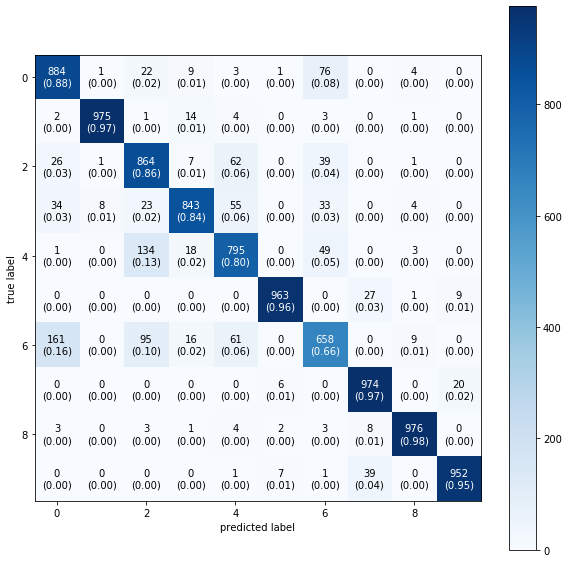

In [122]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=mat, figsize=(10, 10),show_normed=True,colorbar=True)  